<a href="https://colab.research.google.com/github/chacosa9/Traffic-Analysis/blob/main/week2_project_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [310]:
df.sample(6)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
8358,20:00:00,Thursday,31-50,Male,High school,Owner,2-5yr,Other,Owner,1>2yr,...,Going straight,Driver or rider,Male,Under 18,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
9103,18:50:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,1>2yr,...,Going straight,Driver or rider,Female,Over 51,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
571,17:41:00,Monday,18-30,Male,Junior high school,Employee,5-10yr,Long lorry,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,Unknown,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
7331,13:02:00,Monday,Under 18,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11642,11:15:00,Friday,31-50,Male,Junior high school,Employee,2-5yr,Stationwagen,Organization,1>2yr,...,Entering a junction,Driver or rider,Male,5,2,Driver,Normal,Not a Pedestrian,No distancing,Serious Injury
4368,12:30:00,Tuesday,31-50,Male,Elementary school,Employee,5-10yr,Automobile,Owner,1>2yr,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury


In [5]:
df = pd.read_csv('RTA_Dataset.csv')

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties',

In [361]:
corr1 = df[['Age_band_of_driver','Sex_of_driver','Educational_level',
'Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle',
'Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Lanes_or_Medians','Road_allignment','Types_of_Junction']]


In [295]:
dff = df[['Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Road_surface_conditions','Light_conditions','Weather_conditions','Type_of_collision']]
dff

,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision
0,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles
1,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
2,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects
3,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision
4,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision
...,...,...,...,...,...,...,...,...
12311,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12312,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12313,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision
12314,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision


In [284]:
df.Sex_of_casualty.unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [367]:
df.drop_duplicates(inplace=True)

In [368]:
corr1['Owner_of_vehicle'].unique()

['Owner', 'Governmental', 'Organization', 'Other']
Categories (4, object): ['Governmental', 'Organization', 'Other', 'Owner']

In [379]:
corr1 = df[['Time','Casualty_severity','Number_of_vehicles_involved','Number_of_casualties']]


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Time                         12316 non-null  object  
 1   Day_of_week                  12316 non-null  category
 2   Age_band_of_driver           12316 non-null  object  
 3   Sex_of_driver                12316 non-null  category
 4   Educational_level            12316 non-null  category
 5   Vehicle_driver_relation      12316 non-null  category
 6   Driving_experience           12316 non-null  object  
 7   Type_of_vehicle              12316 non-null  category
 8   Owner_of_vehicle             12316 non-null  category
 9   Service_year_of_vehicle      12316 non-null  object  
 10  Defect_of_vehicle            12316 non-null  object  
 11  Area_accident_occured        12316 non-null  category
 12  Lanes_or_Medians             12316 non-null  object  
 13  R

In [27]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [216]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


Type_of_collision	155 -- Vehicle_movement	308 -- Work_of_casuality	3198 --
Fitness_of_casuality	2635

In [369]:
df.shape

(12316, 32)

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

Educational_level	741--
Vehicle_driver_relation	579--
Driving_experience	829--
Type_of_vehicle	950--
Owner_of_vehicle	482--
Service_year_of_vehicle	3928--
Defect_of_vehicle	4427--
Area_accident_occured	239--
Lanes_or_Medians	385--
Road_allignment	142--
Types_of_Junction	887--
Road_surface_type	172--

In [381]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time


In [385]:
corr1= df[['Day_of_week','Age_band_of_driver','Sex_of_driver'
,'Educational_level','Type_of_vehicle',
'Cause_of_accident','Accident_severity']]

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Time                         12316 non-null  object  
 1   Day_of_week                  12316 non-null  category
 2   Age_band_of_driver           12316 non-null  object  
 3   Sex_of_driver                12316 non-null  category
 4   Educational_level            12316 non-null  category
 5   Vehicle_driver_relation      12316 non-null  category
 6   Driving_experience           12316 non-null  object  
 7   Type_of_vehicle              12316 non-null  category
 8   Owner_of_vehicle             12316 non-null  category
 9   Service_year_of_vehicle      12316 non-null  object  
 10  Defect_of_vehicle            12316 non-null  object  
 11  Area_accident_occured        12316 non-null  category
 12  Lanes_or_Medians             12316 non-null  object  
 13  R

In [388]:
corr1 = df[['Casualty_severity','Number_of_vehicles_involved','Number_of_casualties']]
corr1.corr()

,Casualty_severity,Number_of_vehicles_involved,Number_of_casualties
Casualty_severity,1.000000,0.012554,0.003476
Number_of_vehicles_involved,0.012554,1.000000,0.213427
Number_of_casualties,0.003476,0.213427,1.000000


In [342]:
corr1.describe()

,Casualty_severity,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000,12316.000000
mean,2.933176,2.040679,1.548149
std,0.258042,0.688790,1.007179
min,1.000000,1.000000,1.000000
25%,3.000000,2.000000,1.000000
50%,3.000000,2.000000,1.000000
75%,3.000000,2.000000,2.000000
max,3.000000,7.000000,8.000000


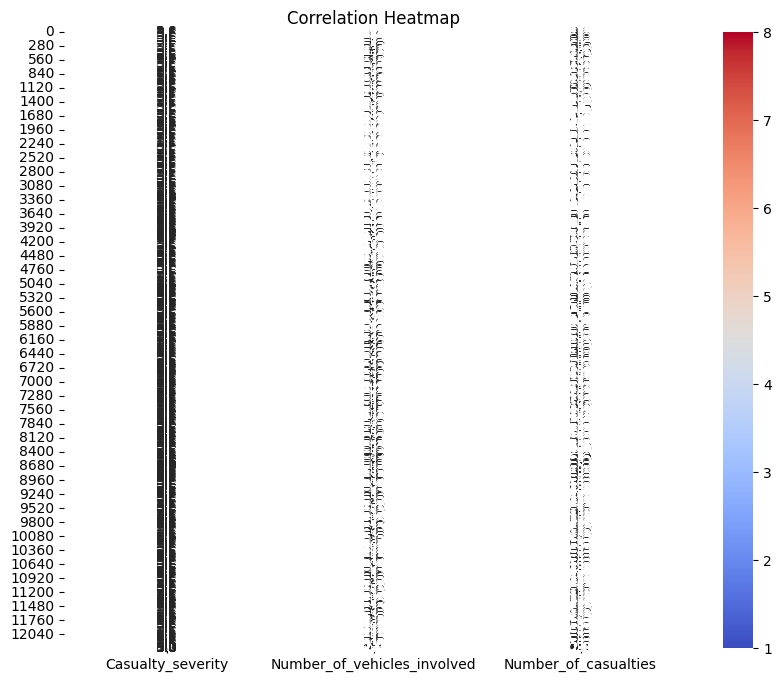

In [393]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr1, annot=True, cmap='coolwarm', fmt='.1f',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Time                         12316 non-null  object  
 1   Day_of_week                  12316 non-null  category
 2   Age_band_of_driver           12316 non-null  object  
 3   Sex_of_driver                12316 non-null  category
 4   Educational_level            12316 non-null  category
 5   Vehicle_driver_relation      12316 non-null  category
 6   Driving_experience           12316 non-null  object  
 7   Type_of_vehicle              12316 non-null  category
 8   Owner_of_vehicle             12316 non-null  category
 9   Service_year_of_vehicle      12316 non-null  object  
 10  Defect_of_vehicle            12316 non-null  object  
 11  Area_accident_occured        12316 non-null  category
 12  Lanes_or_Medians             12316 non-null  object  
 13  R

In [ ]:
[['Casualty_severity','Number_of_vehicles_involved','Number_of_casualties']]

Sex_of_casualty	Age_band_of_casualty	Casualty_severity

In [326]:
df['Day_of_week'] = df['Day_of_week'].astype('category')
df['Sex_of_driver'] = df['Sex_of_driver'].astype('category')
df['Educational_level'] = df['Educational_level'].astype('category')
df['Type_of_vehicle'] = df['Type_of_vehicle'].astype('category')
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].astype('category')
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].astype('category')
df['Vehicle_movement']= df['Vehicle_movement'].astype('category')
df['Casualty_class'] = df['Casualty_class'].astype('category')
df['Area_accident_occured'] = df['Area_accident_occured'].astype('category')
df['Sex_of_casualty'] = df['Sex_of_casualty'].astype('category')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].astype('category')
df['Work_of_casuality'] = df['Work_of_casuality'].astype('category')
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].astype('category')
df['Pedestrian_movement'] = df['Pedestrian_movement'].astype('category')
df['Cause_of_accident'] = df['Cause_of_accident'].astype('category')
df['Accident_severity'] = df['Accident_severity'].astype('category')
df['Types_of_Junction'] = df['Types_of_Junction'].astype('category')
df['Road_surface_type'] = df['Road_surface_type'].astype('category')
df['Road_surface_conditions'] = df['Road_surface_conditions'].astype('category')
df['Light_conditions'] = df['Light_conditions'].astype('category')
df['Weather_conditions'] = df['Weather_conditions'].astype('category')

df['Casualty_severity'] = df['Casualty_severity'].astype('float64')
df['Number_of_vehicles_involved'] = df['Number_of_vehicles_involved'].astype('float64')
df['Number_of_casualties'] = df['Number_of_casualties'].astype('float64')



In [234]:
df.Age_band_of_casualty.mode()[0]

''

In [228]:
df.Sex_of_casualty.mode()[0]

'Male'

In [280]:
#replacing the Nan , null ,Unknown  to a real nan value
df['Age_band_of_driver'] = df['Age_band_of_driver'].replace('Unknown','')

df['Sex_of_driver'] = df['Sex_of_driver'].replace('Unknown','')

df['Sex_of_driver'] = df['Sex_of_driver'].replace('','Male')

df['Driving_experience'] = df['Driving_experience'].replace('No Licence','Below 1yr')

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('Unknown','1>2yr')

df['Casualty_class'] = df['Casualty_class'].replace('na','')

df['Casualty_class'] = df['Casualty_class'].replace('','Driver or rider')

df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('na','')
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('','Male')

df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('na','')
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('','18-30')

df['Casualty_severity'] = df['Casualty_severity'].replace('na','')
df['Casualty_severity'] = df['Casualty_severity'].replace('','3')

df['Lanes_or_Medians'] = df['Lanes_or_Medians'].replace('Unknown','Other')

df['Vehicle_movement'] = df['Vehicle_movement'].replace('','Going straight')



In [203]:
#using Mode to fill nan value
df['Educational_level'] = df['Educational_level'].fillna(df['Educational_level'].mode()[0])

#using Mode to fill nan value
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna(df['Vehicle_driver_relation'].mode()[0])

df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])

df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])

df['Driving_experience'] = df['Driving_experience'].fillna(df['Driving_experience'].mode()[0])

df['Type_of_vehicle']=df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0])

df['Owner_of_vehicle']=df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0])

df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])

df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])

df['Road_allignment'] = df['Road_allignment'].fillna(df['Road_allignment'].mode()[0])

df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])

df['Road_surface_type'] = df['Road_surface_type'].fillna(df['Road_surface_type'].mode()[0])

df['Type_of_collision'] = df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0])

df['Vehicle_movement'] = df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0])

df['Work_of_casuality'] = df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0])

df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0])

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

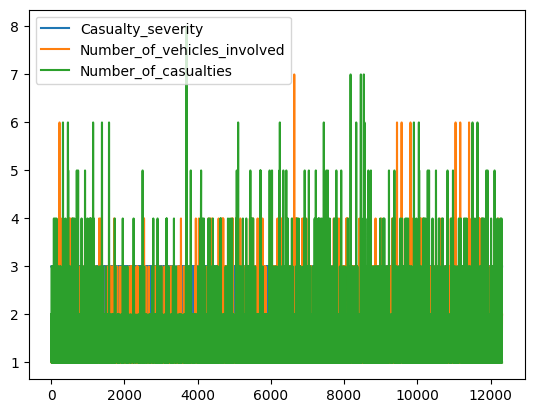

In [343]:
corr1.plot(kind='line')
plt.show()

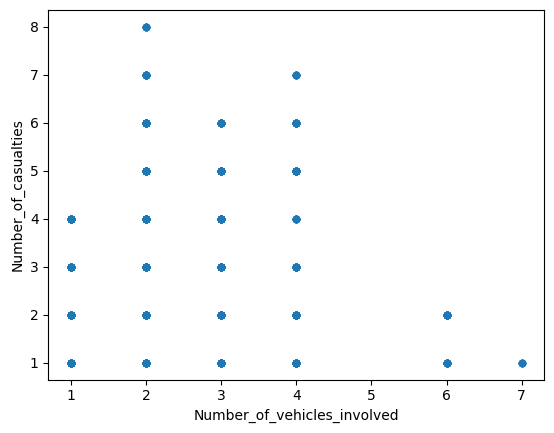

In [345]:

corr1.plot(kind='scatter', x='Number_of_vehicles_involved', y='Number_of_casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [356]:
target = 'Accident_severity'

Features = df[['Time','Day_of_week','Age_band_of_driver','Sex_of_driver'
,'Educational_level','Type_of_vehicle',
'Cause_of_accident','Accident_severity']]

X = [Features]
y = [target]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Time                12316 non-null  object  
 1   Day_of_week         12316 non-null  category
 2   Age_band_of_driver  12316 non-null  object  
 3   Sex_of_driver       12316 non-null  category
 4   Educational_level   12316 non-null  category
 5   Type_of_vehicle     12316 non-null  category
 6   Cause_of_accident   12316 non-null  category
 7   Accident_severity   12316 non-null  category
dtypes: category(6), object(2)
memory usage: 267.0+ KB


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

#### Decision Tree Classifier

In [ ]:
target = 'Accident_severity'

features = df[['Time','Day_of_week','Age_band_of_driver','Sex_of_driver'
,'Educational_level','Type_of_vehicle',
'Cause_of_accident','Accident_severity']]

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#### Support Vector Machine (SVM)

#### K-Neighbors Classifier

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: